In [26]:
import pandas as pd

a_df = pd.read_csv('./datasets/Airline Quality Ratings.csv')
a_df

# ID: 승객 식별자
# 성별: 승객 성별
# 나이: 승객 나이
# 고객 유형: 고객 유형
# 여행 유형: 승객의 비행 목적
# 등급: 승객이 이용하는 비행기의 여행 등급
# 비행 거리: 비행 거리
# 출발 지연: 출발시 지연된 시간 (분 단위)
# 도착 지연: 도착시 지연된 시간 (분 단위)
# 출발 및 도착 시간 편의성: 승객에게 출발 및 도착 시간의 편의성
# 온라인 예약 용이성: 예약이 쉬운 정도
# 체크인 서비스: 체크인의 용이성
# 온라인 탑승: 온라인 체크인의 편의성
# 게이트 위치: 게이트 위치 평가
# 기내 서비스: 기내 서비스 수준
# 좌석 편안함: 좌석의 편안함
# 다리 공간 서비스: 다리 공간 서비스 수준
# 청결도: 청결도 수준
# 음식과 음료: 음식과 음료의 품질
# 기내 서비스: 기내 서비스 수준
# 기내 와이파이 서비스: 기내 와이파이 품질 수준
# 기내 엔터테인먼트: 기내 엔터테인먼트 평가
# 수하물 처리: 수하물 처리에 대한 의견
# 만족도: 항공사 만족도 수준

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [27]:
a_df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [28]:
a_df.duplicated().sum()

0

In [29]:
a_df.dropna(inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

columns =  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'] 

# columns = ft.iloc[:,:-1]

encoders = {}

for column in columns:
    encoder = LabelEncoder()
    a_df[column] = encoder.fit_transform(a_df[column].tolist())
    encoders[column] = encoder
    # print(f'{column}: {encoder.classes_}')


# state_encoder = LabelEncoder()
# state = state_encoder.fit_transform(a_df['Status'].tolist())
# a_df['Status'] = state

a_df = a_df.drop(labels=['ID'], axis=1)

In [31]:
a_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,1,41,1,1,2,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,1,42,1,1,2,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,0
129878,1,50,1,1,2,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,1


In [32]:
a_df['Class'].value_counts()

Class
0    61990
1    58117
2     9380
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = a_df.iloc[:, :-1], a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[13263  1382]
 [ 1870  9383]]
정확도: 0.8744, 정밀도: 0.8716, 재현율: 0.8338, F1: 0.8523, ROC-AUC: 0.8697
################################################################################


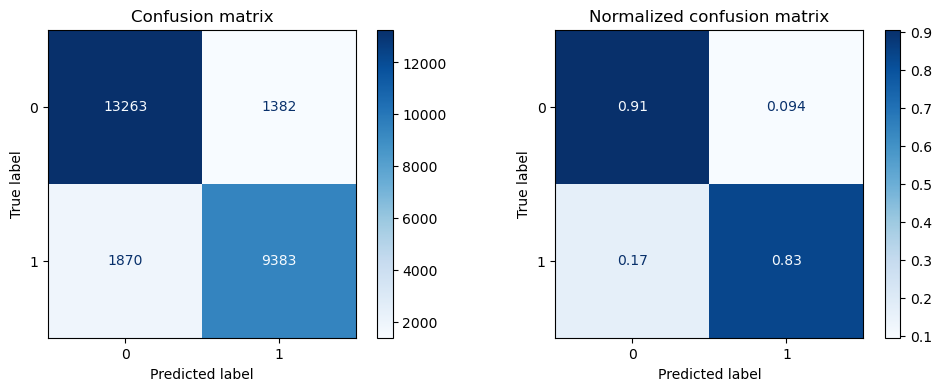

In [35]:
get_evaluation(y_test, prediction, logistic_r, X_test)

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Customer Type'}>,
        <Axes: title={'center': 'Type of Travel'}>,
        <Axes: title={'center': 'Class'}>],
       [<Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Departure Delay'}>,
        <Axes: title={'center': 'Arrival Delay'}>,
        <Axes: title={'center': 'Departure and Arrival Time Convenience'}>,
        <Axes: title={'center': 'Ease of Online Booking'}>],
       [<Axes: title={'center': 'Check-in Service'}>,
        <Axes: title={'center': 'Online Boarding'}>,
        <Axes: title={'center': 'Gate Location'}>,
        <Axes: title={'center': 'On-board Service'}>,
        <Axes: title={'center': 'Seat Comfort'}>],
       [<Axes: title={'center': 'Leg Room Service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Food and Drink'}>,
        <Axes: title={'center': 'In-flight Service'}>,
 

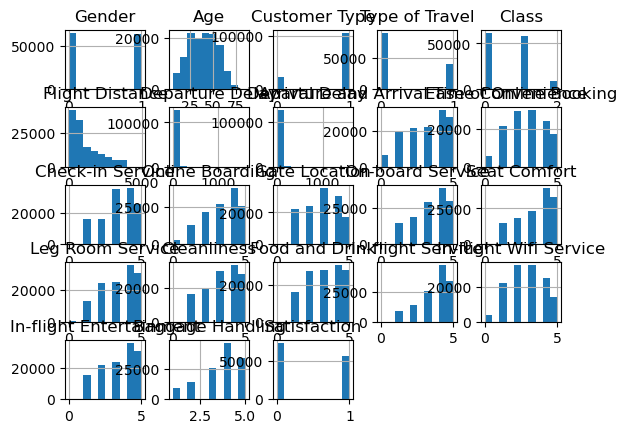

In [36]:
a_df.hist()

In [66]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 생성
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)

# k-fold 교차 검증 수행 (여기서는 k=5)
cv_scores = cross_val_score(logistic_r, X_train, y_train, cv=5)

# 교차 검증 결과 출력
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.87392605 0.87527754 0.87252631 0.87185056 0.87700922]
Mean CV accuracy: 0.8741179361832174


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 생성
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)

# k-fold 교차 검증 수행 (여기서는 k=5)
cv_scores = cross_val_score(logistic_r, X_test, y_test, cv=5)

# 교차 검증 결과 출력
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.87200772 0.87297297 0.87181467 0.87758254 0.87391388]
Mean CV accuracy: 0.8736583589354394


임계치 조정

양성(Positive): 항공사 서비스 만족
음성(Negative): 항공사 서비스 불만족 
.

True Positive (TP):항공사 서비스에 만족을 한다고 예측  -> 실제로 만족

False Positive (FP) : 항공사 서비스에 대한 불만족을 예측했지만 실제로는 만족한 경우입니다. (오류, error)
(True Negativ (TN) ): 항공사 서비스에 대한 만족을 예측했고, 실제로도 만족하지 않은 경우입니다
.N(False Negati (FN) e): 항공사 서비스에 대한 만족을 예측했지만 실제로는 불만족한 경우입니다(놓침, error II)다.정밀도(Precision)는 모델이 만족을 예측한 경우 중에서 실제로 고객이 만족한 비율을 의미합니다.
재현율(Recall)은 실제로 만족한 고객 중에서 모델이 정확하게 만족을 감지한 비율을 나타냅니다.다.

🏆임계치낮춰여재현율을도를 높여주는 것이 적합하다.

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

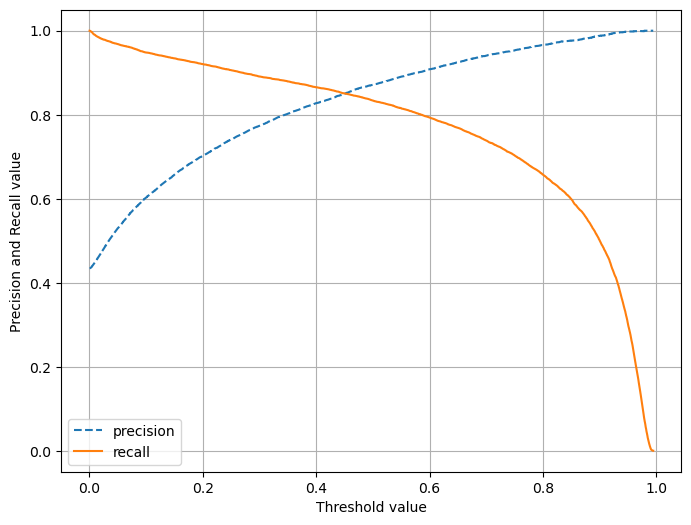

In [56]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test, proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)

    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

# 테스트 세트의 예측 확률을 얻어오는 부분
proba_class1 = logistic_r.predict_proba(X_test)[:, 1]

# 정밀도-재현율 곡선 그리기
precision_recall_curve_plot(y_test, proba_class1)


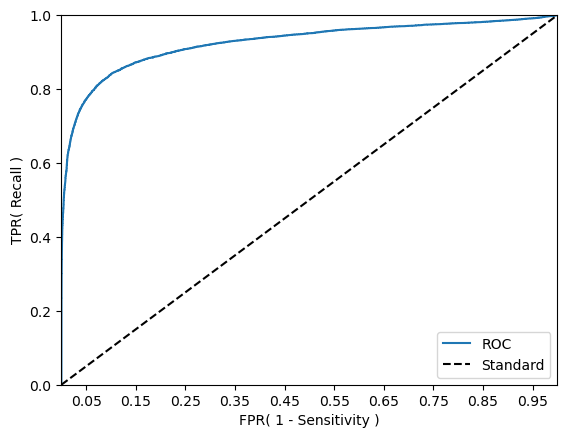

In [57]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, proba_class1)

In [58]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = logistic_r.predict_proba(X_test)
prediction = logistic_r.predict(X_test)

In [59]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[13263  1382]
 [ 1870  9383]]
정확도: 0.8744, 정밀도: 0.8716, 재현율: 0.8338, F1: 0.8523, ROC-AUC: 0.8697
################################################################################


In [62]:
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([2.02123600e-04, 2.21967344e-04, 3.08341756e-04, ...,
       9.93648022e-01, 9.93909465e-01, 9.94597798e-01])

오차 행렬
[[11081  3564]
 [ 1057 10196]]
정확도: 0.8216, 정밀도: 0.7410, 재현율: 0.9061, F1: 0.8153, ROC-AUC: 0.8314
################################################################################


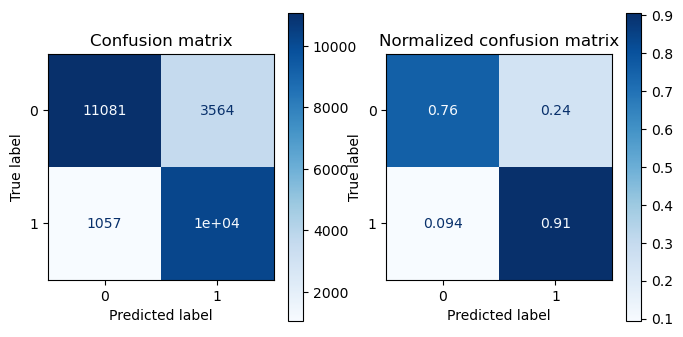

In [78]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.25).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

### 결과


- 계속 잘나와서 전처리 하면서 더 잘나오게 하는 방법 찾으면서 조금더 접근해봅시다.